# EDA on OntoNotes v5 NER dataset

![Python](https://img.shields.io/static/v1?label=Python&message=3.9&color=red&style=flat)
![Pandas](https://img.shields.io/static/v1?label=Pandas&message=1.4&color=blue&style=flat)
![Matplotlib](https://img.shields.io/static/v1?label=Matplotlib&message=3.5&color=green&style=flat)

In first step we will be importing required libraries for loading data and to do dataset ploting.

In [82]:
import numpy as np

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
# To check the list of styles are available for use -> plt.style.available
plt.style.use('seaborn')

import seaborn as sns


import itertools

In [84]:
matplotlib.__version__, pd.__version__

('3.5.2', '1.4.2')

In [2]:
def format_data(lines):
    word_ls, tag_ls = [], []
    for _l in lines:
        _word, _tag = _l.strip().split("\t")
        word_ls.append(_word)
        tag_ls.append(_tag)
    return word_ls, tag_ls

def load_data(path):
    with open(path, 'r') as _file:
        all_data = []
        for i, (x, y) in enumerate(itertools.groupby(_file, lambda x : x == '\n')):
            if x: continue
            y = format_data(y)
            all_data.append(y)
        df = pd.DataFrame(all_data, columns=["words", "tags"])
        return df 

In [3]:
train_df = load_data('data/ontonotes/train.conll')
test_df = load_data('data/ontonotes/test.conll')

In [4]:
train_df.shape, test_df.shape

((75187, 2), (9479, 2))

In [5]:
train_df.head()

,words,tags
0,"[What, kind, of, memory, ?]","[O, O, O, O, O]"
1,"[We, respectfully, invite, you, to, watch, a, ...","[O, O, O, O, O, O, O, O, O, O, B-ORG, I-ORG, O]"
2,"[WW, II, Landmarks, on, the, Great, Earth, of,...","[B-WORK_OF_ART, I-WORK_OF_ART, I-WORK_OF_ART, ..."
3,"[Standing, tall, on, Taihang, Mountain, is, th...","[O, O, O, B-LOC, I-LOC, O, B-WORK_OF_ART, I-WO..."
4,"[It, is, composed, of, a, primary, stele, ,, s...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


#### Length of the sentences

To calculate total number of word in single sentence and stores in same dataframe into `total_words` column.

In [6]:
train_df['total_words'] = train_df.words.map(lambda x : len(x))

In whole dataset we have on an average `17 words` in single sentence.

Here we also have one word in some sentences as well.

In [36]:
total_word_mean = np.mean(train_df.total_words)
total_word_median = np.median(train_df.total_words)
total_word_mean, total_word_median, np.max(train_df.total_words), np.min(train_df.total_words)

(17.281072525835583, 14.0, 210, 1)

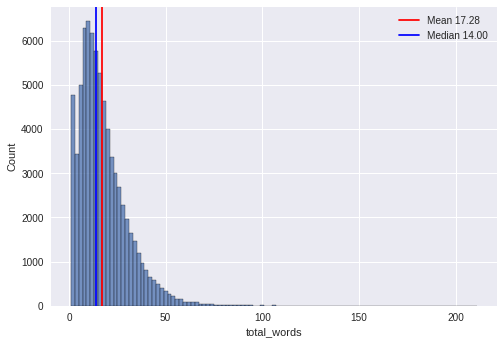

In [53]:
ax = sns.histplot(train_df.total_words, binwidth=2)
ax.axvline(total_word_mean, color='red', label=f'Mean {total_word_mean:.2f}')
ax.axvline(total_word_median, color='blue', label=f'Median {total_word_median:.2f}')
plt.legend()
plt.show()

`97%` of the training data has length of sentence below `50 words`.

In [19]:
sum(train_df.total_words < 50) / len(train_df)

0.9770705042095043

#### NER Tags

In [55]:
from collections import Counter

In [79]:
np.unique(np.hstack(train_df.tags.values), return_counts=True)

(array(['B-CARDINAL', 'B-DATE', 'B-EVENT', 'B-FAC', 'B-GPE', 'B-LANGUAGE',
        'B-LAW', 'B-LOC', 'B-MONEY', 'B-NORP', 'B-ORDINAL', 'B-ORG',
        'B-PERCENT', 'B-PERSON', 'B-PRODUCT', 'B-QUANTITY', 'B-TIME',
        'B-WORK_OF_ART', 'I-CARDINAL', 'I-DATE', 'I-EVENT', 'I-FAC',
        'I-GPE', 'I-LANGUAGE', 'I-LAW', 'I-LOC', 'I-MONEY', 'I-NORP',
        'I-ORDINAL', 'I-ORG', 'I-PERCENT', 'I-PERSON', 'I-PRODUCT',
        'I-QUANTITY', 'I-TIME', 'I-WORK_OF_ART', 'O'], dtype='<U13'),
 array([   7367,   10922,     748,     860,   15405,     304,     282,
           1514,    2434,    6870,    1640,   12820,    1763,   15429,
            606,     657,    1233,     974,    2289,   13333,    1605,
           1467,    3679,      13,     785,    1395,    4920,     446,
              5,   18246,    2498,   11147,     576,    1235,    1507,
           2400, 1149938]))